In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import sqlite3
from scipy.stats  import ttest_ind
import scipy.stats as stats
warnings.filterwarnings('ignore')

In [3]:
conn = sqlite3.connect('/content/drive/MyDrive/big_project/inventory.db')
df = pd.read_sql_query(" select * from vendor_sales_summary",conn)
df.head()

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,AvgSalesPrice,TotalExciseTax,FreightCost,grossprofit,profitmargin,stockturnover,salestopurchaseratio
0,1128,BROWN-FORMAN CORP,1233,Jack Daniels No 7 Black,26.27,36.99,1750.0,145080,3811251.60,1440.0,51825.60,35.990000,2645.68,68601.68,-3759426.00,-7253.994165,0.009926,0.013598
1,4425,MARTIGNETTI COMPANIES,3405,Tito's Handmade Vodka,23.19,28.99,1750.0,164038,3804041.22,1043.0,31279.57,29.990000,1916.28,144929.24,-3772761.65,-12061.424278,0.006358,0.008223
2,17035,PERNOD RICARD USA,8068,Absolut 80 Proof,18.24,24.99,1750.0,187407,3418303.68,1530.0,39533.70,25.883417,2811.08,123780.22,-3378769.98,-8546.556432,0.008164,0.011565
3,3960,DIAGEO NORTH AMERICA INC,4261,Capt Morgan Spiced Rum,16.17,22.99,1750.0,201682,3261197.94,2974.0,65398.26,21.990000,5464.51,257032.07,-3195799.68,-4886.673866,0.014746,0.020053
4,3960,DIAGEO NORTH AMERICA INC,3545,Ketel One Vodka,21.89,29.99,1750.0,138109,3023206.01,1573.0,47408.27,30.177726,2890.18,257032.07,-2975797.74,-6276.959147,0.011390,0.015681


In [9]:
# summary statistics

df.describe().T

,count,mean,std,min,25%,50%,75%,max
VendorNumber,10692.0,1.065065e+04,18753.519148,2.00,3951.0000,7153.000,9552.000000,2.013590e+05
Brand,10692.0,1.803923e+04,12662.187074,58.00,5793.5000,18761.500,25514.250000,9.063100e+04
PurchasePrice,10692.0,2.438530e+01,109.269375,0.36,6.8400,10.455,19.482500,5.681810e+03
ActualPrice,10692.0,3.564367e+01,148.246016,0.49,10.9900,15.990,28.990000,7.499990e+03
Volume,10692.0,8.473605e+02,664.309212,50.00,750.0000,750.000,750.000000,2.000000e+04
TotalPurchaseQuantity,10692.0,3.140887e+03,11095.086769,1.00,36.0000,262.000,1975.750000,3.376600e+05
TotalPurchaseDollars,10692.0,3.010669e+04,123067.799627,0.71,453.4575,3655.465,20738.245000,3.811252e+06
TotalSalesQuantity,10692.0,3.233502e+01,130.947947,0.00,0.0000,0.000,14.000000,4.022000e+03
TotalSalesDollars,10692.0,4.155230e+02,1750.544930,0.00,0.0000,0.000,230.930000,6.539826e+04
AvgSalesPrice,10692.0,8.366624e+00,15.920495,0.00,0.0000,0.000,12.990000,3.499900e+02


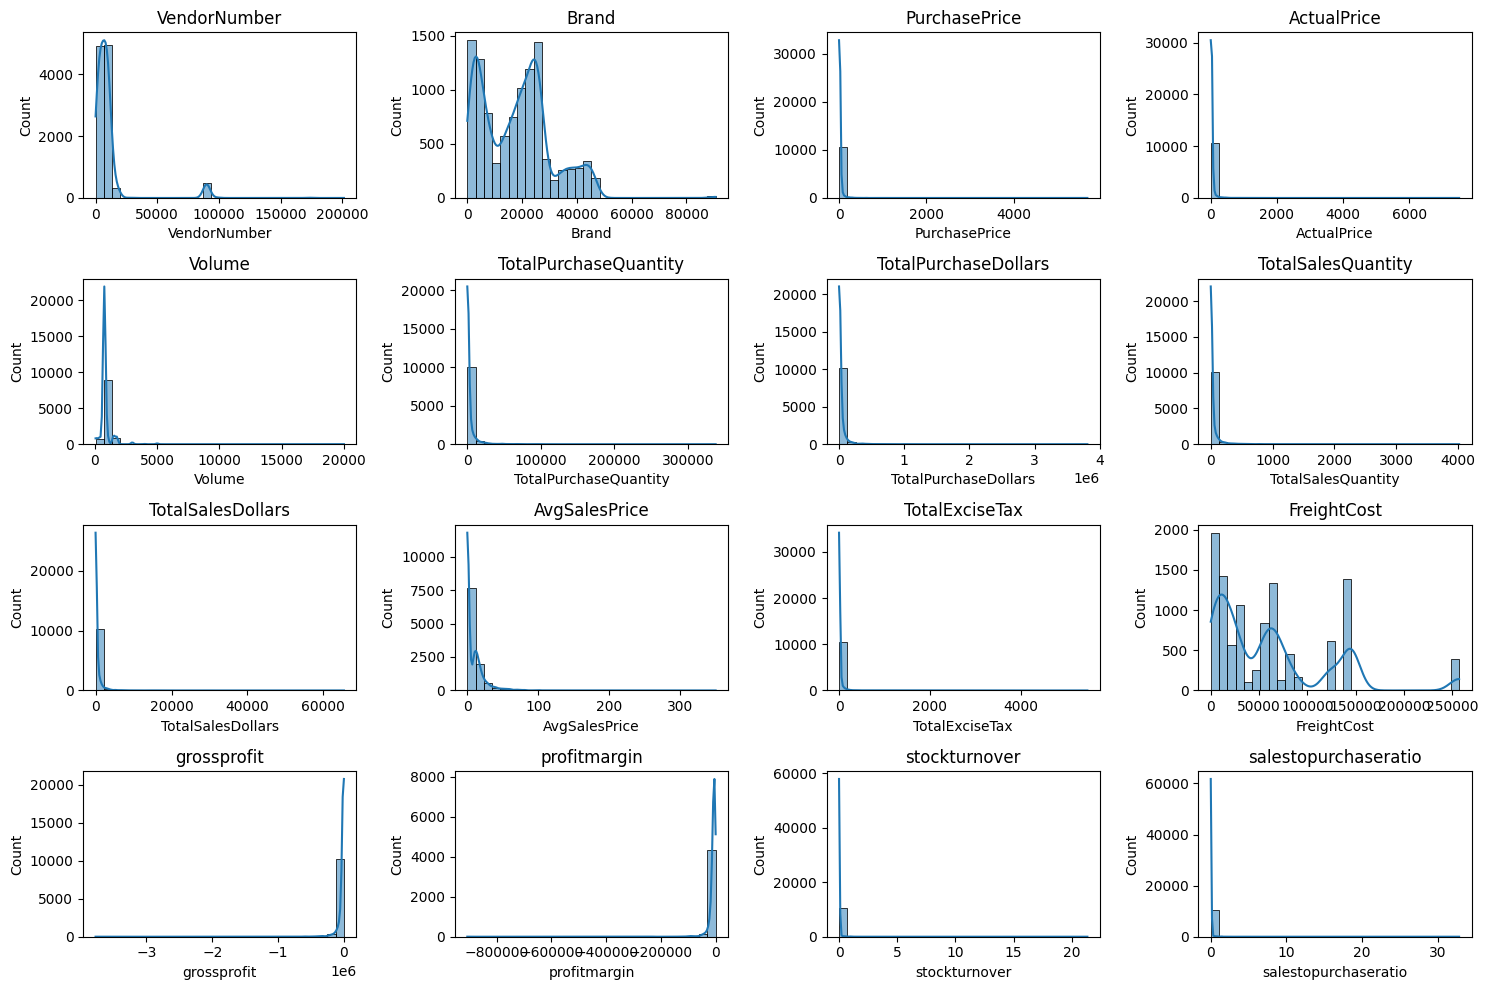

In [4]:
numericalcols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,10))
for i,col in enumerate(numericalcols):
  plt.subplot(4,4,i+1)
  sns.histplot(df[col],kde=True,bins=30)
  plt.title(col)
plt.tight_layout()
plt.show()

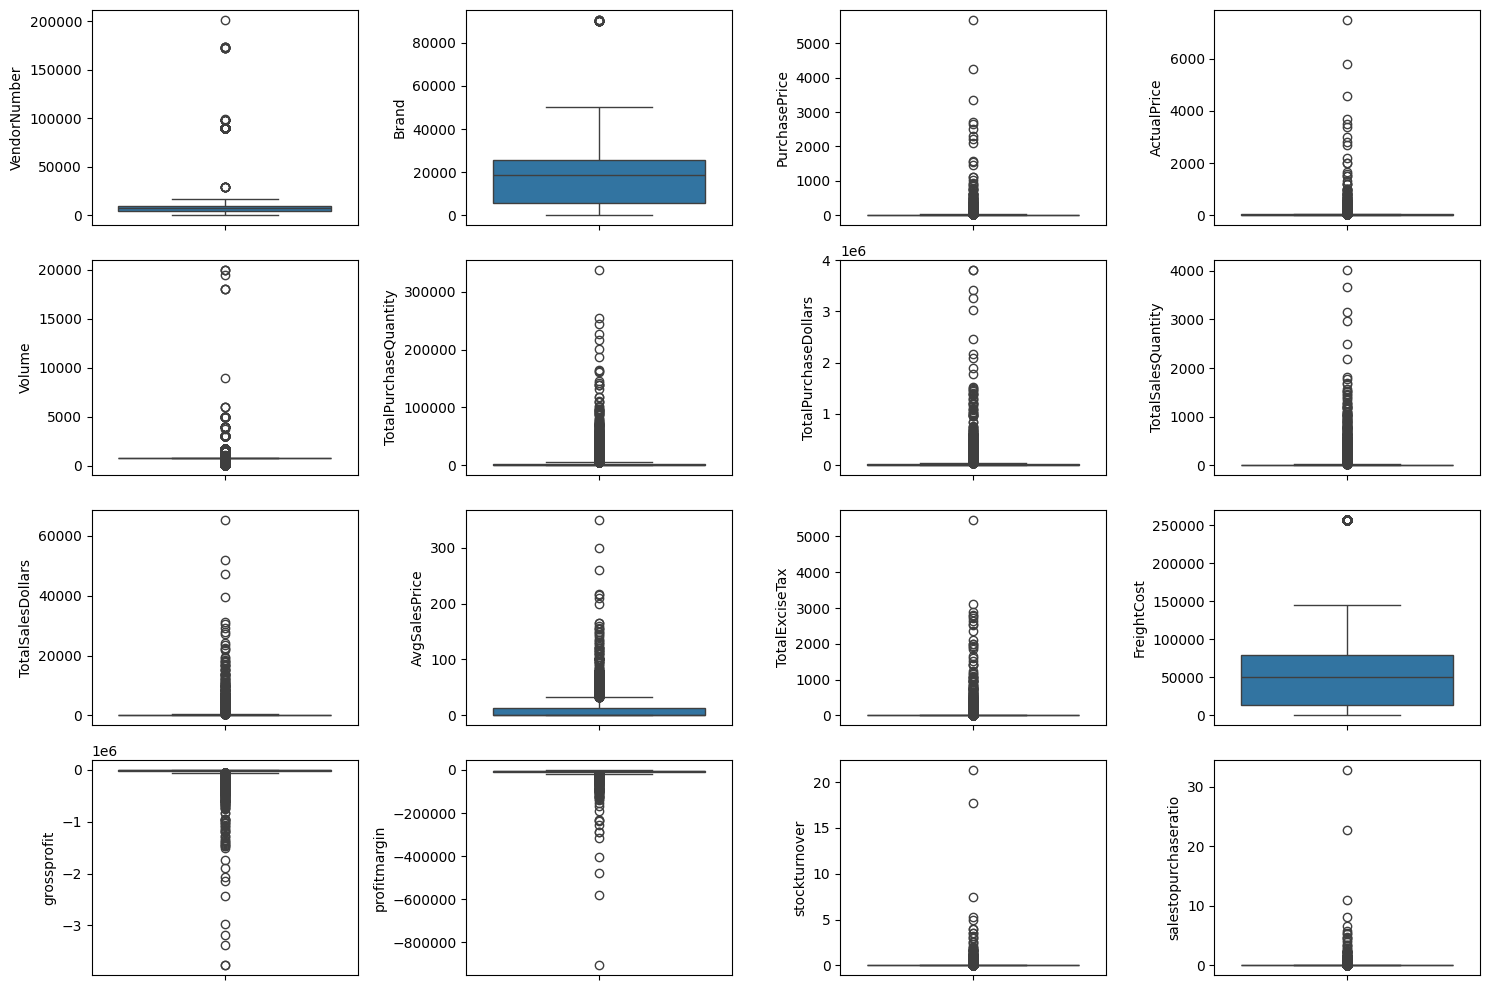

In [14]:
numericalcols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(15,10))
for i,col in enumerate(numericalcols):
  plt.subplot(4,4,i+1)
  sns.boxplot(y = df[col])
  # plt.title(col)
plt.tight_layout()
plt.show()

In [6]:
df = pd.read_sql_query(
    """
    select * from vendor_sales_summary
    where grossprofit > 0
    and profitmargin > 0
    and TotalSalesQuantity > 0


    """

,conn)
df

,VendorNumber,VendorName,Brand,Description,PurchasePrice,ActualPrice,Volume,TotalPurchaseQuantity,TotalPurchaseDollars,TotalSalesQuantity,TotalSalesDollars,AvgSalesPrice,TotalExciseTax,FreightCost,grossprofit,profitmargin,stockturnover,salestopurchaseratio
0,4425,MARTIGNETTI COMPANIES,24936,T-Vine Petite Sirah Napa,9.67,14.99,750.0,105,1015.35,69.0,1034.31,14.99,7.72,144929.24,18.96,1.833106,0.657143,1.018673
1,1128,BROWN-FORMAN CORP,7780,Herradura Reposado Lot 598,34.58,45.99,750.0,24,829.92,22.0,1011.78,45.99,17.33,68601.68,181.86,17.974263,0.916667,1.219130
2,9552,M S WALKER INC,8550,S S Pierce Vodka,9.39,12.49,1750.0,72,676.08,120.0,1498.80,12.49,220.50,55551.82,822.72,54.891914,1.666667,2.216897
3,1590,DIAGEO CHATEAU ESTATE WINES,10242,Rosenblum RSV Znfdl Monte Rs,15.17,21.99,750.0,37,561.29,45.0,989.55,21.99,5.02,7259.75,428.26,43.278258,1.216216,1.762992
4,4692,KOBRAND CORPORATION,20422,M Chiarlo Barberesco Anni 09,18.06,27.99,750.0,26,469.56,20.0,559.80,27.99,2.23,9139.38,90.24,16.120043,0.769231,1.192180
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
60,8352,LUXCO INC,1007,12 Days of Pearls Gift Set,7.19,9.99,50.0,1,7.19,2.0,19.98,9.99,0.10,10261.60,12.79,64.014014,2.000000,2.778860
61,12546,JIM BEAM BRANDS COMPANY,5250,DeKuyper Buttershots Trav,7.14,9.99,750.0,1,7.14,3.0,32.97,10.99,2.37,123880.97,25.83,78.343949,3.000000,4.617647
62,7153,PINE STATE TRADING CO,41231,Mad Dogs & Englishmen Jumil,6.53,9.99,750.0,1,6.53,2.0,27.98,13.99,0.22,15884.82,21.45,76.661901,2.000000,4.284839
63,9552,M S WALKER INC,8151,St Elder Elderflower Liqueur,0.71,0.99,50.0,8,5.68,11.0,10.89,0.99,0.55,55551.82,5.21,47.842057,1.375000,1.917254


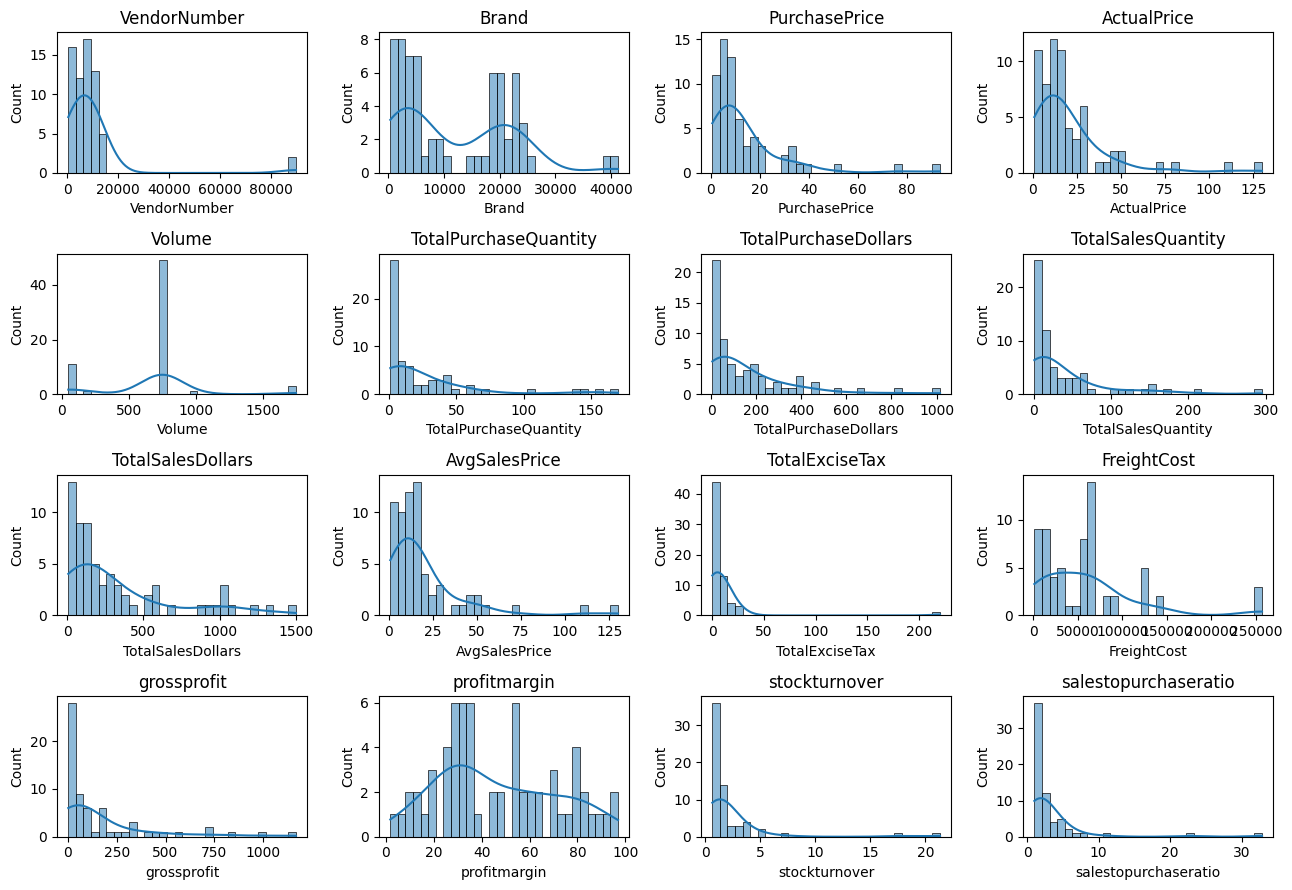

In [26]:
numericalcols = df.select_dtypes(include=np.number).columns

plt.figure(figsize=(13,9))
for i,col in enumerate(numericalcols):
  plt.subplot(4,4,i+1)
  sns.histplot(df[col],kde=True,bins=30)
  plt.title(col)
plt.tight_layout()
plt.show()

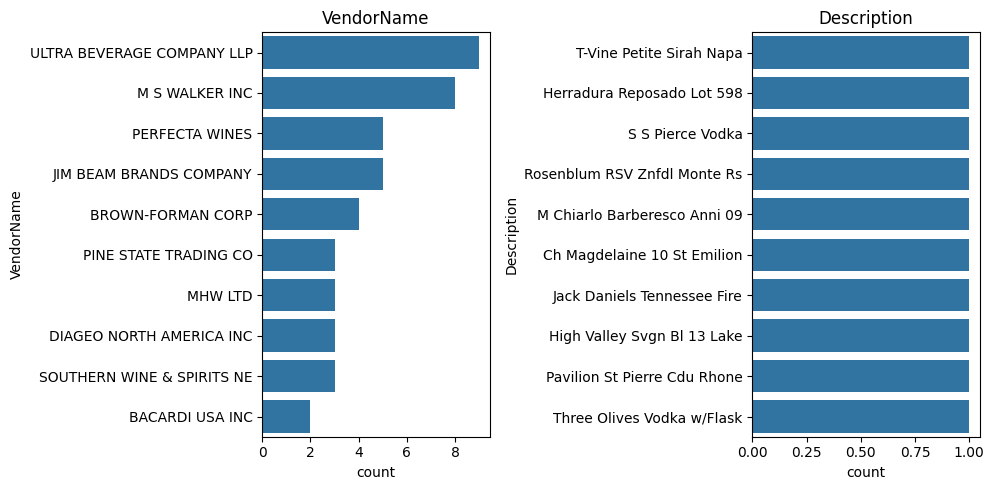

In [8]:
categoricalcols = ['VendorName',"Description"]

plt.figure(figsize=(10,5))
for i,col in enumerate(categoricalcols):
  plt.subplot(1,2,i+1)
  sns.countplot(y=df[col],order = df[col].value_counts().index[:10])
  plt.title(col)
plt.tight_layout()
plt.show()

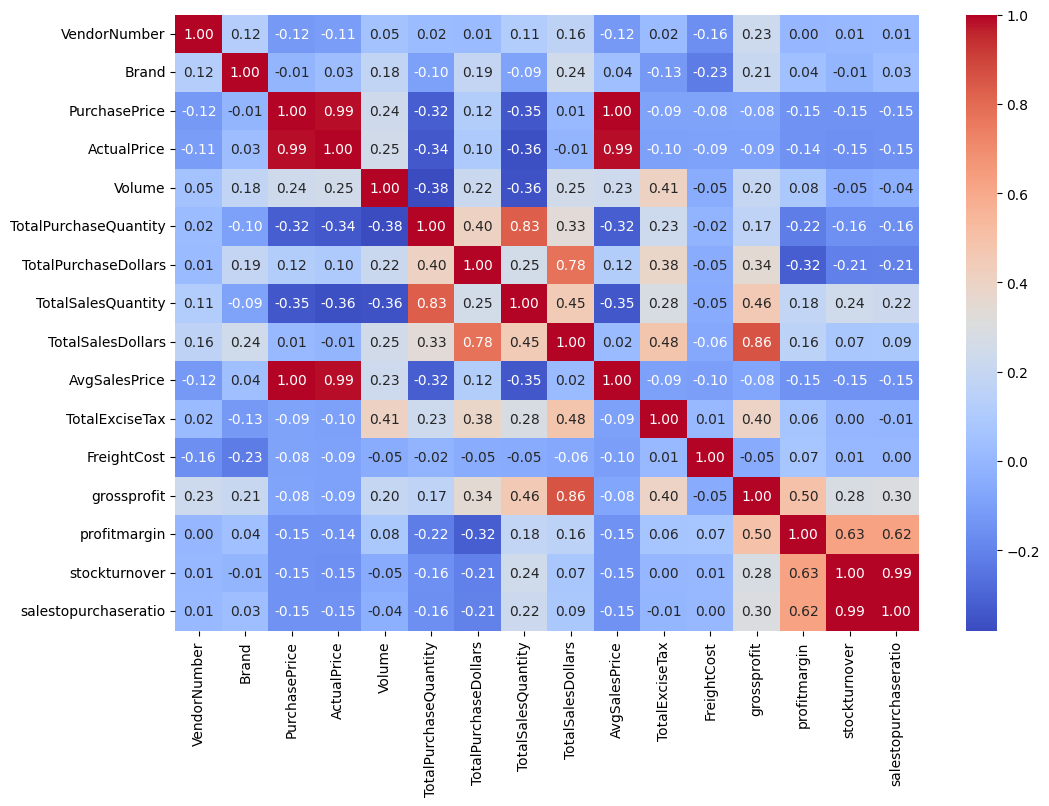

In [9]:
plt.figure(figsize= (12,8))
correlationmatrix  = df[numericalcols].corr()
sns.heatmap(correlationmatrix,annot=True,cmap='coolwarm',fmt = '.2f')
plt.show()

**data analysis**

* identify brands that need promotional or pricing adjustments which exhibit lower sales performance but higher profit margins


In [10]:
brandperformance = df.groupby('Description').agg({
    'TotalSalesDollars': 'sum',
    'profitmargin': 'mean'
}).reset_index()

In [11]:
low_sales_threshold = brandperformance['TotalSalesDollars'].quantile(0.15)
high_margin_threshold = brandperformance['profitmargin'].quantile(0.85)


In [38]:
print(low_sales_threshold)


44.660000000000004


In [37]:
print(high_margin_threshold)

78.2503574678279


In [12]:
targetbrands = brandperformance[
    (brandperformance['TotalSalesDollars'] <= low_sales_threshold) &
    (brandperformance['profitmargin'] >= high_margin_threshold)
]
display(targetbrands.sort_values('TotalSalesDollars'))

,Description,TotalSalesDollars,profitmargin
16,DeKuyper Buttershots Trav,32.97,78.343949


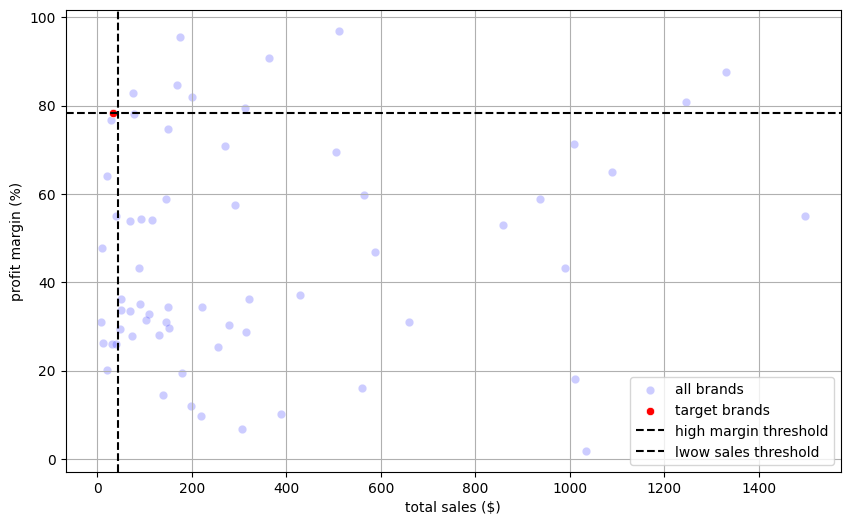

In [13]:
plt.figure(figsize= (10,6))
sns.scatterplot(data = brandperformance,x = 'TotalSalesDollars',y='profitmargin',color = 'blue',label="all brands",alpha = 0.2)
sns.scatterplot(data = targetbrands,x = 'TotalSalesDollars',y='profitmargin',color = 'red',label="target brands")
plt.axhline(high_margin_threshold,linestyle = '--',color = 'black',label = 'high margin threshold')
plt.axvline(low_sales_threshold,linestyle = '--',color = 'black',label = 'lwow sales threshold')

plt.xlabel('total sales ($)')
plt.ylabel('profit margin (%)')
plt.legend()
plt.grid(True)
plt.show()


In [14]:
top_vendors = df.groupby("VendorName")['TotalSalesDollars'].sum().nlargest(10)
top_brands = df.groupby("Description")['TotalSalesDollars'].sum().nlargest(10)
top_vendors


,TotalSalesDollars
VendorName,
ULTRA BEVERAGE COMPANY LLP,3653.21
M S WALKER INC,3024.86
SOUTHERN WINE & SPIRITS NE,2161.15
BROWN-FORMAN CORP,2111.52
VINILANDIA USA,1552.08
MARTIGNETTI COMPANIES,1110.27
DIAGEO CHATEAU ESTATE WINES,989.55
PERFECTA WINES,922.41
JIM BEAM BRANDS COMPANY,819.12


In [44]:
top_brands

,TotalSalesDollars
Description,
S S Pierce Vodka,1498.80
Havens Cab Svgn 11,1331.26
Zinsane Znfdl Lodi,1246.44
Pavilion St Pierre Cdu Rhone,1088.91
T-Vine Petite Sirah Napa,1034.31
Herradura Reposado Lot 598,1011.78
Conti Zecca Negroamaro 10,1008.99
Rosenblum RSV Znfdl Monte Rs,989.55
High Valley Svgn Bl 13 Lake,937.33


In [15]:
def formatdollars(value):
  if value >= 1_000_000:
    return f"{value / 1_000_000:.2f}M"
  elif value >= 1_000:
    return f"{value / 1_00:.2f}K"
  else:
   return str(value)

In [51]:
top_brands.apply(lambda x: formatdollars(x))

,TotalSalesDollars
Description,
S S Pierce Vodka,14.99K
Havens Cab Svgn 11,13.31K
Zinsane Znfdl Lodi,12.46K
Pavilion St Pierre Cdu Rhone,10.89K
T-Vine Petite Sirah Napa,10.34K
Herradura Reposado Lot 598,10.12K
Conti Zecca Negroamaro 10,10.09K
Rosenblum RSV Znfdl Monte Rs,989.5500000000002
High Valley Svgn Bl 13 Lake,937.3300000000003


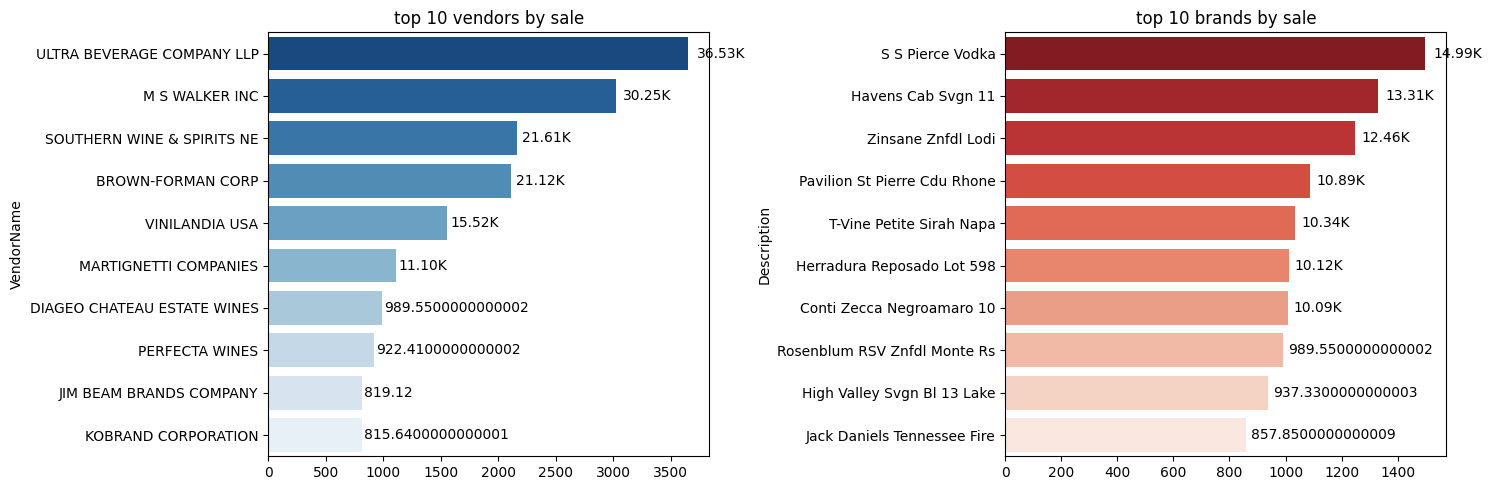

In [16]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
ax1 = sns.barplot(y = top_vendors.index, x = top_vendors.values , palette="Blues_r")
plt.title("top 10 vendors by sale")

for bar in ax1.patches:
  ax1.text(bar.get_width()+(bar.get_width() *0.02 ),
  bar.get_y() + bar.get_height() / 2,
           formatdollars(bar.get_width()),
           ha = 'left' , va ='center',fontsize = 10,color='black'
           )
plt.subplot(1,2,2)
ax2 = sns.barplot(y = top_brands.index.astype(str), x = top_brands.values , palette="Reds_r")
plt.title("top 10 brands by sale")



for bar in ax2.patches:
  ax2.text(bar.get_width()+(bar.get_width() *0.02 ),
  bar.get_y() + bar.get_height() / 2,
          formatdollars(bar.get_width()),
          ha = 'left' , va ='center',fontsize = 10,color='black')
plt.tight_layout()
plt.show()



 **which vendors contributed most to the total purchase dollars**

In [17]:
vendor_performance = df.groupby('VendorName').agg({
    'TotalPurchaseDollars':'sum',
    'grossprofit':'sum',
    "TotalSalesDollars":'sum'
}).reset_index()

In [18]:
vendor_performance['purchasecontribution%'] = vendor_performance['TotalPurchaseDollars'] / vendor_performance['TotalPurchaseDollars'].sum()

In [19]:
vendor_performance = round(vendor_performance.sort_values('purchasecontribution%',ascending=False),2)

In [20]:
numericalcols = vendor_performance.select_dtypes(include=np.number).columns
# vendor_performance = vendor_performance[numericalcols].select_dtypes(include = np.number)

In [21]:
top_vendors  = vendor_performance.head(10)
top_vendors['TotalPurchaseDollars'] = top_vendors['TotalPurchaseDollars'].apply(formatdollars)
top_vendors['TotalSalesDollars'] = top_vendors['TotalSalesDollars'].apply(formatdollars)
top_vendors['grossprofit'] = top_vendors['grossprofit'].apply(formatdollars)
top_vendors

,VendorName,TotalPurchaseDollars,grossprofit,TotalSalesDollars,purchasecontribution%
11,M S WALKER INC,13.65K,16.59K,30.25K,0.13
1,BROWN-FORMAN CORP,13.14K,797.29,21.12K,0.12
20,SOUTHERN WINE & SPIRITS NE,10.67K,10.94K,21.61K,0.10
13,MARTIGNETTI COMPANIES,10.28K,81.82,11.10K,0.10
23,ULTRA BEVERAGE COMPANY LLP,917.54,27.36K,36.53K,0.09
9,KOBRAND CORPORATION,660.44,155.2,815.64,0.06
4,DIAGEO CHATEAU ESTATE WINES,561.29,428.26,989.55,0.05
24,VINILANDIA USA,524.54,10.28K,15.52K,0.05
16,PERFECTA WINES,484.3,438.11,922.41,0.05
21,STATE WINE & SPIRITS,429.84,206.58,636.42,0.04


In [22]:
vendor_performance['purchasecontribution%']= vendor_performance['TotalPurchaseDollars'] / vendor_performance['TotalPurchaseDollars'].sum()*100

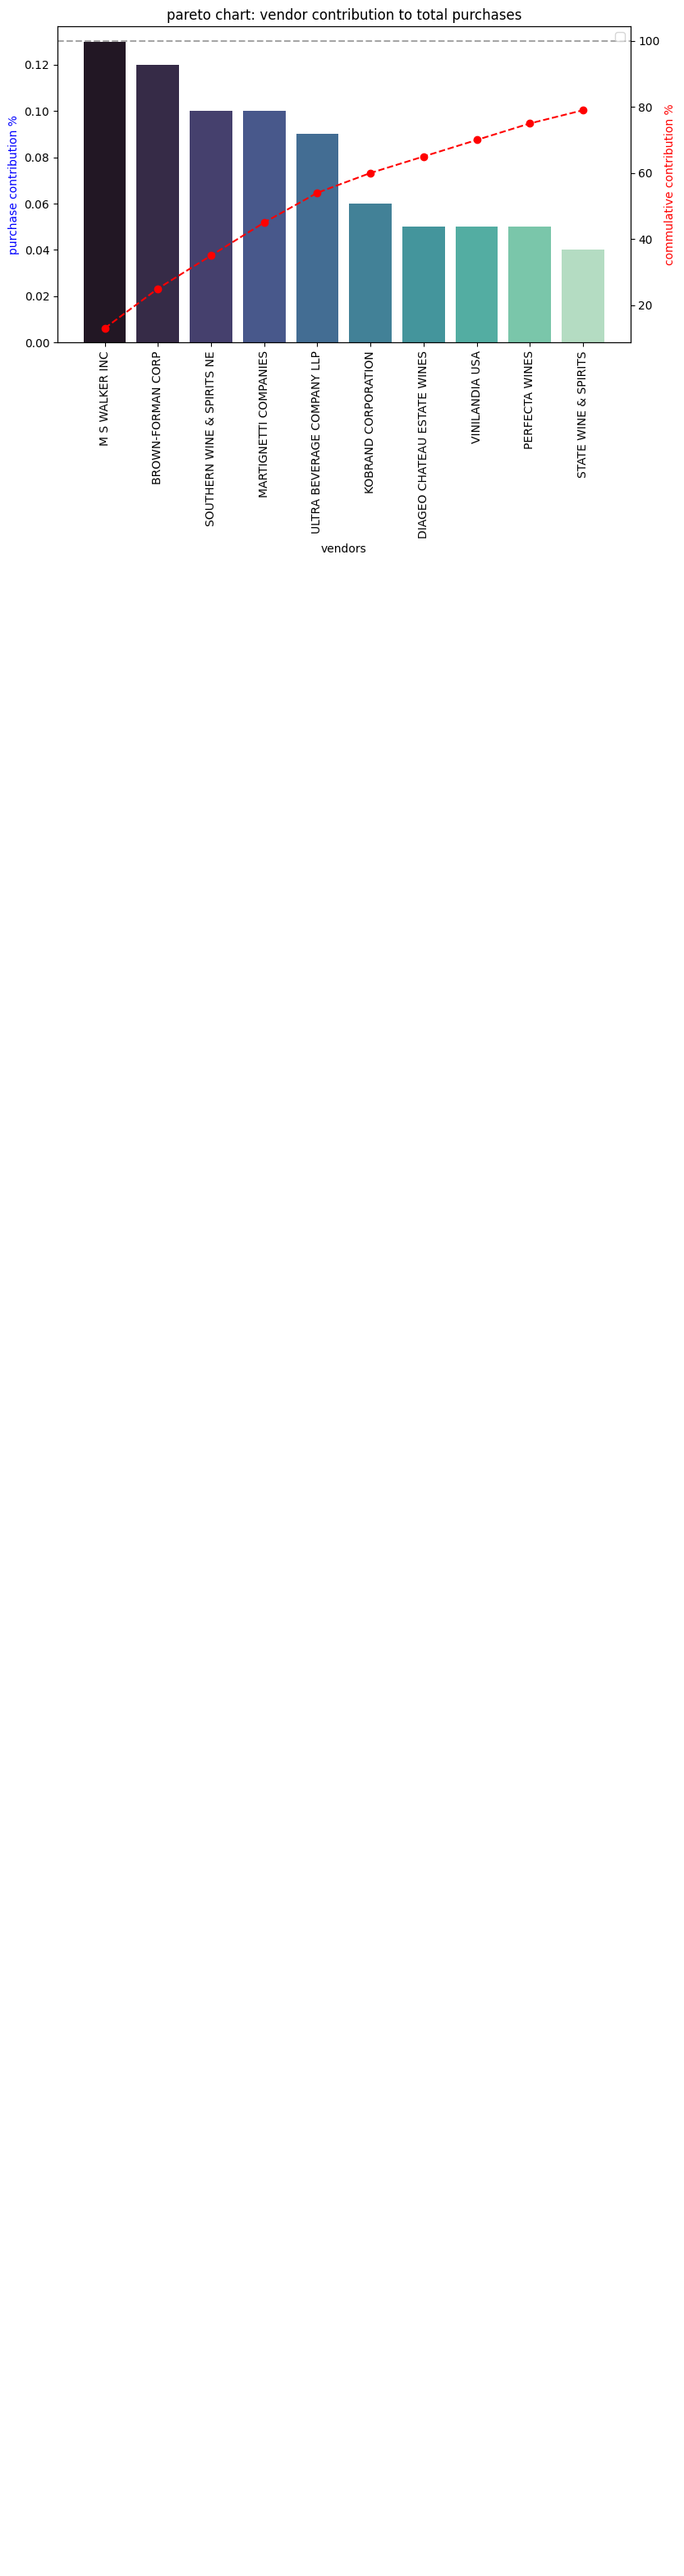

In [24]:
top_vendors['commulative_contributions'] = top_vendors['purchasecontribution%'].cumsum()*100

fig,ax1 = plt.subplots(figsize=(9,5))

sns.barplot( x = top_vendors['VendorName'],y= top_vendors['purchasecontribution%'],palette= "mako",ax =ax1 )

for i,value in enumerate(top_vendors['purchasecontribution%']):
  ax1.text(i,value-1,str(value)+'%',ha='center',color='white',fontsize=10)
ax2 = ax1.twinx()
ax2.plot(top_vendors['VendorName'],top_vendors['commulative_contributions'],color= 'red',marker = 'o',linestyle = 'dashed')

ax1.set_xticklabels(top_vendors['VendorName'],rotation = 90)
ax1.set_ylabel('purchase contribution %',color='blue')
ax2.set_ylabel('commulative contribution %',color='red')
ax1.set_xlabel('vendors')
ax1.set_title("pareto chart: vendor contribution to total purchases")


ax2.axhline(y=100,color="gray",linestyle = "dashed",alpha=0.7)
ax2.legend(loc='upper right')
plt.show()

In [93]:
print(f"total purchase contributions of top 10 vendors is {round( top_vendors['purchasecontribution%'].sum(),2)}")

total purchase contributions of top 10 vendors is 0.79


Text(0.5, 1.0, 'top 10 vendors purchase contributions ')

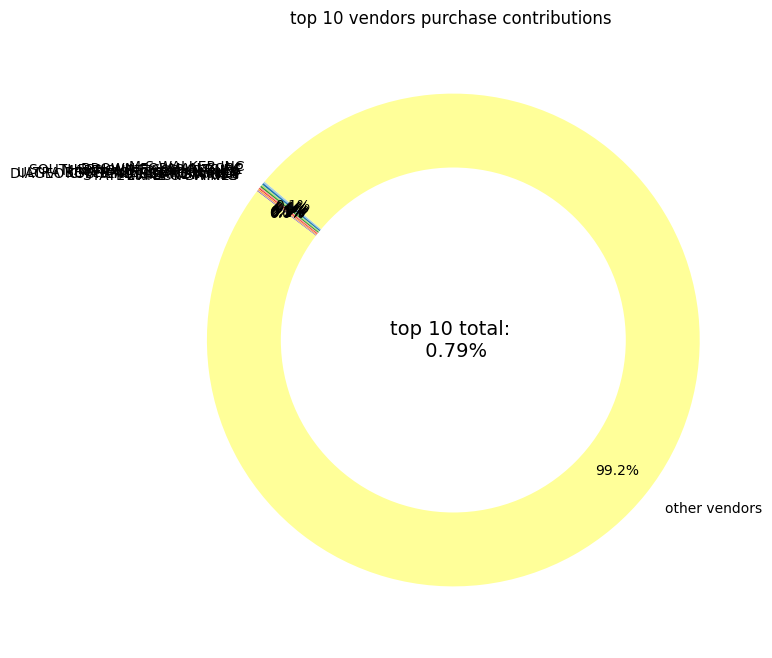

In [98]:

vendors = list(top_vendors['VendorName'].values )
purchase_contributions = list( top_vendors['purchasecontribution%'].values )
total_contribution = sum(purchase_contributions)
remaining_contribution = 100- total_contribution

vendors.append("other vendors")
purchase_contributions.append(remaining_contribution)

fig,ax = plt.subplots(figsize=(8,8))
wedges, texts, autotexts = ax.pie(purchase_contributions,labels = vendors, autopct = '%1.1f%%',
                                  startangle = 140, pctdistance = 0.85,colors = plt.cm.Paired.colors)

centercircle = plt.Circle((0,0),0.70,fc = 'white')
fig.gca().add_artist(centercircle)

plt.text(0,0,f"top 10 total: \n {total_contribution:.2f}%",fontsize = 14,ha='center',va= 'center')
plt.title('top 10 vendors purchase contributions ')

In [99]:
df['unitpurchaseprice'] = df['TotalPurchaseDollars']/ df['TotalPurchaseQuantity']

In [100]:
df['ordersize'] = pd.qcut(df['TotalPurchaseQuantity'],q=3,labels = ["small","medium","large"])

In [101]:
df.groupby('ordersize')[['unitpurchaseprice']].mean()

,unitpurchaseprice
ordersize,
small,21.136250
medium,12.189474
large,7.697273


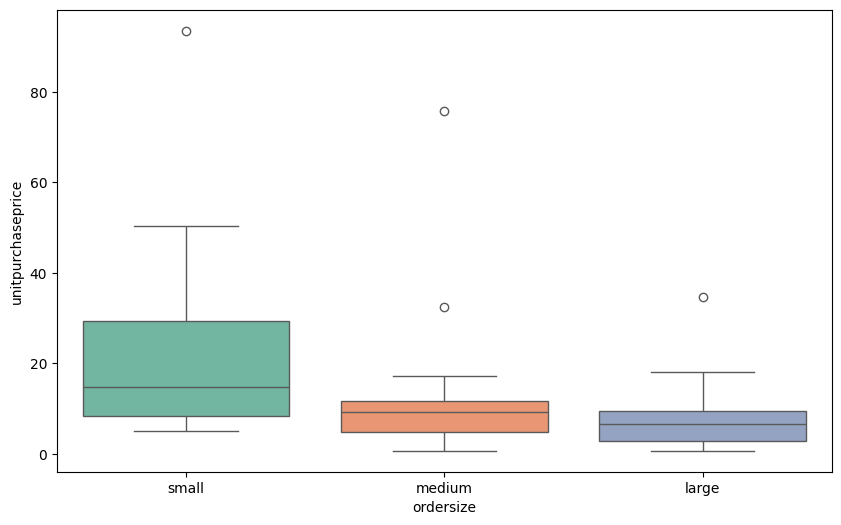

In [102]:
plt.figure(figsize=(10,6))
sns.boxplot(data=df,x= 'ordersize',y='unitpurchaseprice',palette="Set2")
plt.show(

)

In [104]:
df[df['stockturnover']<1].groupby('VendorName')[['stockturnover']].mean().sort_values("stockturnover",ascending = True)

,stockturnover
VendorName,
MARTIGNETTI COMPANIES,0.657143
ULTRA BEVERAGE COMPANY LLP,0.733333
VINILANDIA USA,0.734694
KOBRAND CORPORATION,0.769231
M S WALKER INC,0.800000
CASTLE BRANDS CORP.,0.800000
PROXIMO SPIRITS INC.,0.882353
MHW LTD,0.897436
JIM BEAM BRANDS COMPANY,0.903226


In [106]:
df['unsoldinventoryvalue'] = (df['TotalPurchaseQuantity'] - df['TotalSalesQuantity']) * df['PurchasePrice']
df['unsoldinventoryvalue'].sum()

np.float64(-4375.68)

In [116]:
inventory_value_per_vendor = df.groupby("VendorName")['unsoldinventoryvalue'].sum().reset_index()

inventory_value_per_vendor = inventory_value_per_vendor.sort_values(by='unsoldinventoryvalue',ascending= False)
inventory_value_per_vendor.head()

,VendorName,unsoldinventoryvalue
13,MARTIGNETTI COMPANIES,308.82
9,KOBRAND CORPORATION,108.36
18,PROXIMO SPIRITS INC.,41.24
2,CASTLE BRANDS CORP.,34.86
21,STATE WINE & SPIRITS,8.40


In [118]:
top_threshold = df['TotalSalesDollars'].quantile(0.75)
low_threshold = df['TotalSalesDollars'].quantile(0.25)

In [119]:
top_vendors = df[df['TotalSalesDollars']>= top_threshold]['profitmargin'].dropna()
low_vendors = df[df['TotalSalesDollars']<= low_threshold]['profitmargin'].dropna()

In [120]:
top_vendors

,profitmargin
0,1.833106
1,17.974263
2,54.891914
3,43.278258
4,16.120043
5,31.030094
6,52.848400
7,58.926952
8,65.052208
10,46.926376


In [121]:
low_vendors

,profitmargin
38,27.839763
41,33.479725
45,29.300169
47,33.766753
48,53.852752
49,36.222222
50,25.932329
52,25.941981
53,54.939697
55,20.202020


In [129]:
def confidence_interval(data,confidence = 0.95):
  meanval = np.mean(data)
  std_err = np.std(data,ddof=1)/ np.sqrt(len(data))
  t_critical = stats.t.ppf((1+confidence) /2, df= len(data)-1 )
  margin_of_error= t_critical * std_err
  return round(meanval,2),round(meanval,2) - round(margin_of_error,2),round(meanval,2) + round(margin_of_error,2)

top vendors 95% ci: ( 39.1,65.84 , top mean :52.47 )
low vendors 95% ci: ( 33.39,54.650000000000006 , low mean :44.02 )


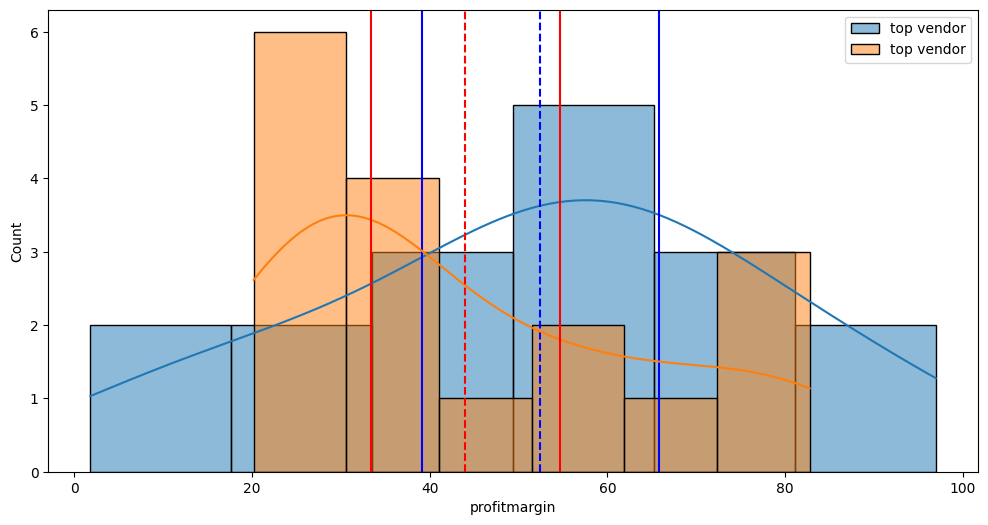

In [133]:
top_mean,top_lower,top_upper = confidence_interval(top_vendors)
low_mean,low_lower,low_upper = confidence_interval(low_vendors)


print(f"top vendors 95% ci: ( {top_lower},{top_upper} , top mean :{top_mean} )")
print(f"low vendors 95% ci: ( {low_lower},{low_upper} , low mean :{low_mean} )")


plt.figure(figsize=(12,6))


sns.histplot(top_vendors ,kde = True, label = "top vendor")
plt.axvline(top_lower,color='blue')
plt.axvline(top_upper,color='blue')
plt.axvline(top_mean,color='blue',linestyle = '--')


sns.histplot(low_vendors ,kde = True, label = "top vendor")
plt.axvline(low_lower,color='red')
plt.axvline(low_upper,color='red')
plt.axvline(low_mean,color='red',linestyle = '--')

plt.legend()
plt.show()